# Farklı Veri setleri ile karşılaştırma

## Breast Canser Veri Seti ile karşılaştırma

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-30-8d58eca03168>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='viridis')


K-NN Doğruluk: 0.96
SVM Doğruluk: 0.98
Decision Tree Doğruluk: 0.93
Random Forest Doğruluk: 0.97
Logistic Regression Doğruluk: 0.98
Naive Bayes Doğruluk: 0.94
Neural Network Doğruluk: 0.98


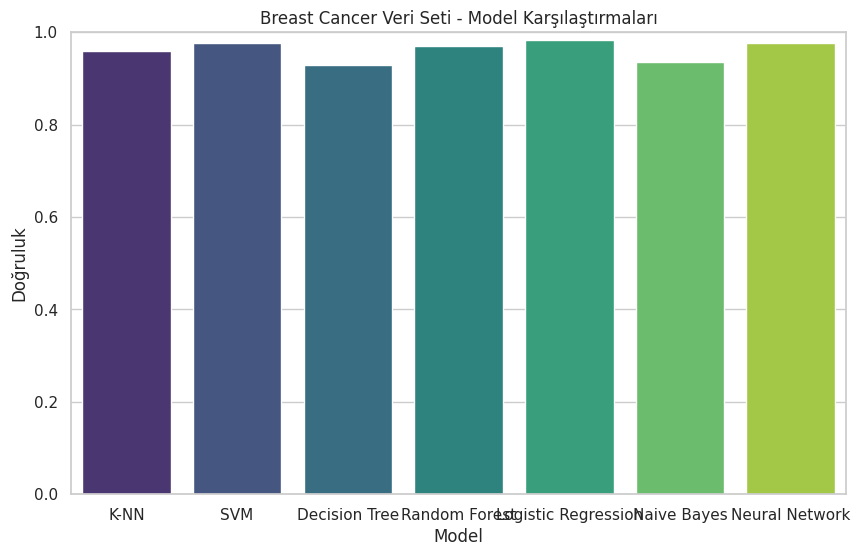

In [ ]:
from sklearn.datasets import load_breast_cancer


# Seaborn stilini kullanmak için
sns.set(style="whitegrid")

# Veri setini yükle ve hazırlık işlemleri
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modellerin tanımlanması
models = {
    'K-NN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=300)
}

# Modellerin eğitilmesi ve doğruluklarının hesaplanması
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Doğruluk sonuçlarını yazdır
for name, accuracy in accuracy_results.items():
    print(f"{name} Doğruluk: {accuracy:.2f}")

# Doğruluk sonuçlarını bar grafikte görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='viridis')
plt.title('Breast Cancer Veri Seti - Model Karşılaştırmaları')
plt.xlabel('Model')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.show()

## Mnist Fetch Openml Veri Seti ile Karşılaştırma

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Lojistik Regresyon Doğruluğu: 0.9208571428571428
SVM Doğruluğu: 0.9764285714285714
Rastgele Orman Doğruluğu: 0.9681428571428572


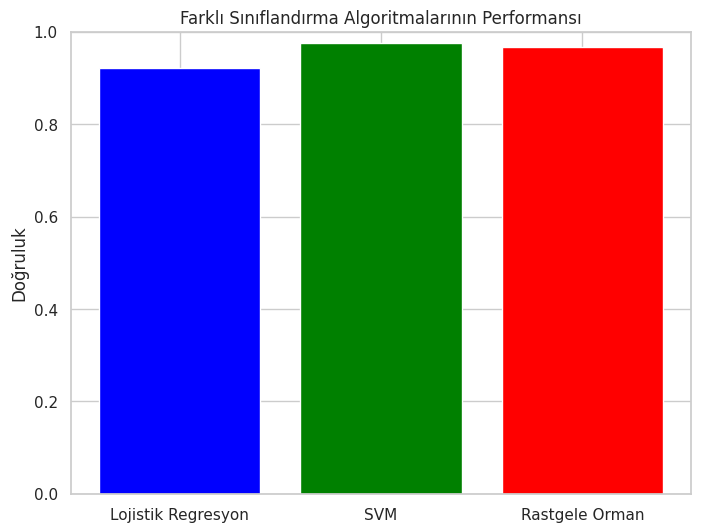

In [ ]:
from sklearn.datasets import fetch_openml


# MNIST veri setini yükleme
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Veriyi normalize etme
X = X / 255.0

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini eğitme
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test))
print("Lojistik Regresyon Doğruluğu:", log_reg_accuracy)

# Destek Vektör Makineleri (SVM) modelini eğitme
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test))
print("SVM Doğruluğu:", svm_accuracy)

# Rastgele Orman modelini eğitme
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
print("Rastgele Orman Doğruluğu:", rf_accuracy)

# Sonuçları görselleştirme
plt.figure(figsize=(8, 6))
models = ['Lojistik Regresyon', 'SVM', 'Rastgele Orman']
accuracies = [log_reg_accuracy, svm_accuracy, rf_accuracy]
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Doğruluk')
plt.title('Farklı Sınıflandırma Algoritmalarının Performansı')
plt.ylim(0.0, 1.0)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lojistik Regresyon Doğruluğu: 0.8522857142857143
SVM Doğruluğu: 0.8887857142857143
Rastgele Orman Doğruluğu: 0.8842142857142857


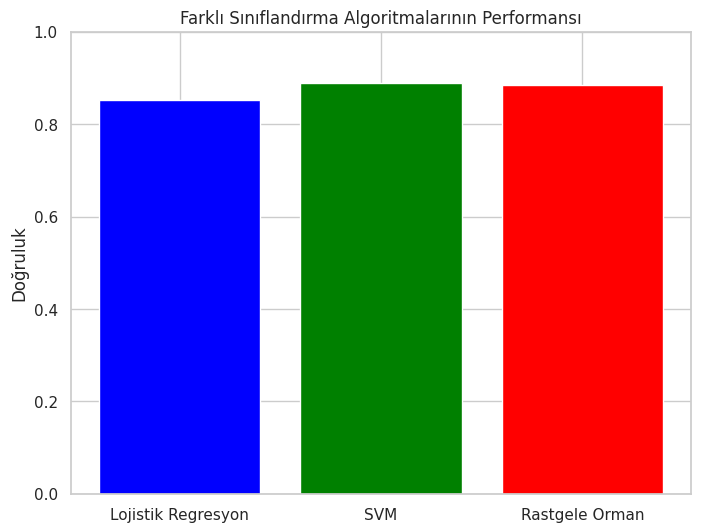

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fashion MNIST veri setini yükleme
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)

# Veriyi özellikler (X) ve etiketler (y) olarak ayırma
X, y = fashion_mnist['data'], fashion_mnist['target']

# Veriyi normalize etme
X = X / 255.0

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini eğitme
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test))
print("Lojistik Regresyon Doğruluğu:", log_reg_accuracy)

# Destek Vektör Makineleri (SVM) modelini eğitme
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test))
print("SVM Doğruluğu:", svm_accuracy)

# Rastgele Orman modelini eğitme
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
print("Rastgele Orman Doğruluğu:", rf_accuracy)

# Sonuçları görselleştirme
plt.figure(figsize=(8, 6))
models = ['Lojistik Regresyon', 'SVM', 'Rastgele Orman']
accuracies = [log_reg_accuracy, svm_accuracy, rf_accuracy]
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Doğruluk')
plt.title('Farklı Sınıflandırma Algoritmalarının Performansı')
plt.ylim(0.0, 1.0)
plt.show()